In [1]:
import numpy as np
import numpy.linalg as LA
from matTools import *
from scf2 import NEGF
from matplotlib import pyplot as plt
from scipy import io
from scipy.linalg import fractional_matrix_power
import transport

from gauopen import QCOpMat as qco
from gauopen import QCBinAr as qcb
from gauopen import QCUtil as qcu

hartree_to_eV = 27.211386

In [2]:
bar = qcb.BinAr(debug=False,lenint=8,inputfile="AuNanowirePeriodic.gjf")
bar.update(model='b3pw91', basis='lanl2dz', toutput='out.log', dofock="scf", miscroute="pbc=gammaonly")
S = np.array(bar.matlist['OVERLAP'].expand())
F = np.array(bar.matlist['ALPHA FOCK MATRIX'].expand())
X = np.array(fractional_matrix_power(S, -0.5))
H = np.real(X@F@X*hartree_to_eV)
Hdict = io.loadmat('AuNanowirePeriodic_SCF.mat')
HdictE = io.loadmat('AuNanowirePeriodic_ESCF.mat')
HdictE2 = io.loadmat('AuNanowirePeriodic_ESCF_half.mat')

In [3]:
from surfGreen import surfG
contactInds = np.arange(0, 22)
onsiteInds = np.arange(22, 44)
alpha = H[np.ix_(contactInds, contactInds)]
beta = H[np.ix_(contactInds, onsiteInds)]
stau = S[np.ix_(contactInds, onsiteInds)]
g = surfG(F, S, [contactInds, onsiteInds], [beta, beta.conj().T], [stau, stau.conj().T])
g.sigmaTot(-5.1, )

array([[-1.50013368e+01-6.61021342e+00j, -7.56012278e+00-1.11714222e+00j,
         6.15841319e+00+1.05395043e+01j, ...,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00-2.85907816e-10j,
         0.00000000e+00+0.00000000e+00j],
       [-7.56012278e+00-1.11714221e+00j, -1.08337120e+01-8.68238227e-01j,
        -4.11895500e-01+3.36817148e+00j, ...,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00-1.47683239e-10j,
         0.00000000e+00+0.00000000e+00j],
       [ 6.15841320e+00+1.05395043e+01j, -4.11895500e-01+3.36817148e+00j,
        -9.11665401e+00-2.05111694e+01j, ...,
         0.00000000e+00+0.00000000e+00j,  0.00000000e+00-1.93077127e-10j,
         0.00000000e+00+0.00000000e+00j],
       ...,
       [ 0.00000000e+00+0.00000000e+00j,  0.00000000e+00+0.00000000e+00j,
         0.00000000e+00+0.00000000e+00j, ...,
        -5.32282526e-02-1.01014829e-09j,  1.87382538e-14-2.48587427e-14j,
        -5.63755619e-15-2.63766710e-16j],
       [ 0.00000000e+00-2.85907816e-10j,  0.

In [5]:
from scfE import NEGFE
negf = NEGFE('AuNanowirePeriodic')# route="pbc=gammaonly")
inds = negf.setContactE([[1],[2]], [beta.conj().T, beta], [stau, stau.conj().T])
negf.setVoltage(-5.52, 0)
negf.SCF(1e-3, 0.05)

Calculation started at Fri Jan 19 13:04:55 2024
Checking AuNanowirePeriodic.chk for saved data...
Done!
ORBS:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2]
Expecting 38 electrons
Actual:  17.311845976214773 electrons
Charge is: 0
Multiplicity is: 1
Initial SCF energy:  -271.0356276565701
###################################
E-field set to 0.0 au
Entering NEGF-SCF loop at: Fri Jan 19 13:04:56 2024
###################################

Iteration 0:
Calculating Density for left contact:
Starting Integration...
Integration done!
Calculating Density for right contact:
Starting Integration...
Integration done!
DEBUG: Compare Density
[0.35584026 1.24985499 0.75691375 1.14528268 1.06742576 1.06750105]
[0.04419957 1.09188649 0.24593998 0.99993524 0.99755987 0.99755987]
Total number of electrons:  17.654498101802364
SCF energy:  -270.7421127310382
Energy difference is:  0.29351492553189473
MaxDP: 1.45E+00 | RMSDP: 6.16E-01

Iteration 1:
Calculating Dens

KeyboardInterrupt: 

In [14]:
Elist = np.linspace(-5, 0, 50)
TnoSCF = transport.cohTrans(Elist, H, Hdict['sig1'][0], Hdict['sig2'][0])
TSCF = transport.cohTrans(Elist, Hdict['H0'], Hdict['sig1'][0], Hdict['sig2'][0])
TESCF = transport.cohTransE(Elist, HdictE['H0'], g)
TESCF2 = transport.cohTransE(Elist, HdictE2['H0'], g)


Energy: -5.0 eV, Transmission= 0.012345795187410673
Energy: -4.8979591836734695 eV, Transmission= 0.013965290118774466
Energy: -4.795918367346939 eV, Transmission= 0.016341353818672355
Energy: -4.6938775510204085 eV, Transmission= 0.019888425075411952
Energy: -4.591836734693878 eV, Transmission= 0.025371048350289176
Energy: -4.489795918367347 eV, Transmission= 0.03431272026709458
Energy: -4.387755102040816 eV, Transmission= 0.05007903650384328
Energy: -4.285714285714286 eV, Transmission= 0.08121443110339113
Energy: -4.183673469387755 eV, Transmission= 0.15388553962999094
Energy: -4.081632653061225 eV, Transmission= 0.3666955305009575
Energy: -3.979591836734694 eV, Transmission= 0.9253379630291169
Energy: -3.877551020408163 eV, Transmission= 0.6555678678260016
Energy: -3.7755102040816326 eV, Transmission= 0.2547287183225602
Energy: -3.673469387755102 eV, Transmission= 0.12402132903796015
Energy: -3.571428571428571 eV, Transmission= 0.07322566980378539
Energy: -3.4693877551020407 eV, Tra

Energy: -5.0 eV, Transmission= 2.5491404171639083
Energy: -4.8979591836734695 eV, Transmission= 2.5909213081182987
Energy: -4.795918367346939 eV, Transmission= 2.6303326877587376
Energy: -4.6938775510204085 eV, Transmission= 2.6658328553323853
Energy: -4.591836734693878 eV, Transmission= 2.696348080633043
Energy: -4.489795918367347 eV, Transmission= 2.7248979080748494
Energy: -4.387755102040816 eV, Transmission= 2.7069816450366875
Energy: -4.285714285714286 eV, Transmission= 2.6706809374127065
Energy: -4.183673469387755 eV, Transmission= 2.6190472804149127
Energy: -4.081632653061225 eV, Transmission= 2.3788788055548866
Energy: -3.979591836734694 eV, Transmission= 2.169541634166937
Energy: -3.877551020408163 eV, Transmission= 2.0100184475190734
Energy: -3.7755102040816326 eV, Transmission= 1.8658296085297827
Energy: -3.673469387755102 eV, Transmission= 1.728694732231275
Energy: -3.571428571428571 eV, Transmission= 1.5967374273773984
Energy: -3.4693877551020407 eV, Transmission= 1.473137

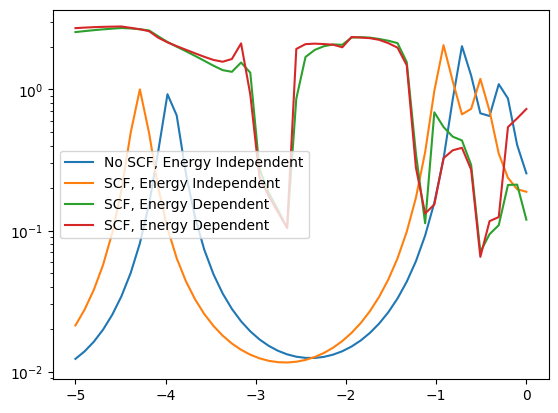

In [15]:
plt.semilogy(Elist, TnoSCF, Elist, TSCF, Elist, TESCF, Elist, TESCF2)
plt.legend((r'No SCF, Energy Independent', 'SCF, Energy Independent', 'SCF, Energy Dependent', 'SCF, Energy Dependent'))

In [4]:
Elist = np.linspace(-5, 0, 50)
DOS1,_ = transport.DOS(Elist, H, Hdict['sig1'][0], Hdict['sig2'][0])
DOS2,_ = transport.DOS(Elist, Hdict['H0'], Hdict['sig1'][0], Hdict['sig2'][0])
DOS3,_ = transport.DOSE(Elist, HdictE['H0'], g)
DOS4,_ = transport.DOSE(Elist, HdictE2['H0'], g)


Energy: -5.0 eV, DOS= 0.07537602181795341
Energy: -4.8979591836734695 eV, DOS= 0.07989827691502131
Energy: -4.795918367346939 eV, DOS= 0.08711641195543073
Energy: -4.6938775510204085 eV, DOS= 0.098392247057016
Energy: -4.591836734693878 eV, DOS= 0.116237633979844
Energy: -4.489795918367347 eV, DOS= 0.14564326540573905
Energy: -4.387755102040816 eV, DOS= 0.19758454076979107
Energy: -4.285714285714286 eV, DOS= 0.2997702350482387
Energy: -4.183673469387755 eV, DOS= 0.5364869630706172
Energy: -4.081632653061225 eV, DOS= 1.2223865337878217
Energy: -3.979591836734694 eV, DOS= 2.991885356863329
Energy: -3.877551020408163 eV, DOS= 2.0874778214880956
Energy: -3.7755102040816326 eV, DOS= 0.8109313259069277
Energy: -3.673469387755102 eV, DOS= 0.4002411067194119
Energy: -3.571428571428571 eV, DOS= 0.2424197049057913
Energy: -3.4693877551020407 eV, DOS= 0.16820737776669126
Energy: -3.36734693877551 eV, DOS= 0.1281748665450836
Energy: -3.2653061224489797 eV, DOS= 0.10451513483488065
Energy: -3.16326

Energy: -5.0 eV, DOS= 0.5507168020907108
Energy: -4.8979591836734695 eV, DOS= 0.5502894564290308
Energy: -4.795918367346939 eV, DOS= 0.5488236950365822
Energy: -4.6938775510204085 eV, DOS= 0.5464414957854843
Energy: -4.591836734693878 eV, DOS= 0.5435038573947232
Energy: -4.489795918367347 eV, DOS= 0.5413572813335622
Energy: -4.387755102040816 eV, DOS= 0.5246880604066777
Energy: -4.285714285714286 eV, DOS= 0.5072409220126941
Energy: -4.183673469387755 eV, DOS= 0.4781225155853154
Energy: -4.081632653061225 eV, DOS= 0.3870745244341914
Energy: -3.979591836734694 eV, DOS= 0.3705190739836619
Energy: -3.877551020408163 eV, DOS= 0.36434081095687765
Energy: -3.7755102040816326 eV, DOS= 0.36320370426532606
Energy: -3.673469387755102 eV, DOS= 0.3672405440438855
Energy: -3.571428571428571 eV, DOS= 0.37901938165309085
Energy: -3.4693877551020407 eV, DOS= 0.40544207258836856
Energy: -3.36734693877551 eV, DOS= 0.46598388995173157
Energy: -3.2653061224489797 eV, DOS= 0.6325885454959947
Energy: -3.1632

In [4]:
plt.semilogy(Elist, DOS1, Elist, DOS2, Elist, DOS3, Elist, DOS4)
plt.legend((r'No SCF, Energy Independent', 'SCF, Energy Independent', 'SCF, Energy Dependent', 'SCF, Energy Dependent'))

NameError: name 'Elist' is not defined

In [10]:
abs((-7.064757543069144+0.1292736138001638j+7.1)/7.1)

0.01887202959937551

In [6]:
negf.setSigma([2], [6], -0.1j, -0.1j)
negf.setVoltage(-5.1, 0)
Fbar = negf.X*(negf.F*27.211386 + negf.sigma12)*negf.X
GamBar1 = negf.X*negf.Gam1*negf.X
D,V = LA.eig(np.asmatrix(Fbar))
D = np.asmatrix(D).T

dE = 1.0

P1 = np.real(density(V,D,GamBar1, -15, -5.1))
P2 = np.real(densityGrid(Fbar, GamBar1, -15, -5.1, dE=dE))
P3 = densityComplex(Fbar, GamBar1, -15, -5.1, dE=dE)


Max imag sigma: 0.100000001


ValueError: operands could not be broadcast together with shapes (3,) (0,) 

In [3]:
negf = NEGF('AuNanowirePeriodic')
negf.setSigma([1], [2], -0.1j)
negf.setVoltage(-5.1, 0)
negf.SCF(1e-6, 0.1)
negf.writeChk()

Calculation started at Thu Jan  4 16:31:37 2024
Checking AuNanowirePeriodic.chk for saved data...
Done!
ORBS:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2]
Expecting 38 electrons
Actual:  21.828936846707542 electrons
Charge is: 0
Multiplicity is: 1
Initial SCF energy:  -270.89059625168386
###################################
Max imag sigma: 0.100000001
[1. 0. 0.] 0 5.064466013834366
E-field set to 0.0 au
Entering NEGF-SCF loop at: Thu Jan  4 16:31:38 2024
###################################

Iteration 0:
Total number of electrons:  21.82893713628423
SCF energy:  -270.8905962422234
Energy difference is:  9.460450201004278e-09
MaxDP: 7.83E-07 | RMSDP: 1.92E-07
##########################################
Convergence achieved after 0 iterations!
--- 2.070755958557129 seconds ---

SCF Loop existed at Thu Jan  4 16:31:39 2024
ENERGY LEVEL OCCUPATION:
Energy =  -113.509 eV | Occ = 1.000
Energy =  -113.504 eV | Occ = 1.000
Energy =   -62.939 eV | Occ 

In [ ]:
s.recursiveResidue(-7.1)

In [22]:
sig = s.sigmaTot(-5.1);
Fbar = X*(F*27.211386 + sig)*X
GamBar1 = X*((sig - sig.getH())*1j)*X
D,V = LA.eig(np.asmatrix(Fbar))
D = np.asmatrix(D).T

E1 = -9
E2 = -7.4
dE = 0.2

P1 = np.real(density(V,D,GamBar1, E1, E2))
P2 = s.densityGrid(E1, E2, dE/100)
P3 = s.densityComplex(E1, E2, dE)
P4 = s.densityComplex(E1, E2, dE, True)


g generated in 190 iterations with convergence 0.000994720783008613
g generated in 310 iterations with convergence 0.000990605626740357
Starting Integration...
g generated in 115 iterations with convergence 0.0009960727852764185
g generated in 116 iterations with convergence 0.0009881831252795041
-8.998999999999999 [-8.68325659-1.47759029j -8.49912007-1.15165994j]
g generated in 112 iterations with convergence 0.0009988470270269544
g generated in 116 iterations with convergence 0.0009894215031222135
-8.997 [-8.68355537-1.47743719j -8.49918041-1.1517031j ]
g generated in 112 iterations with convergence 0.000998568375159312
g generated in 116 iterations with convergence 0.0009906808223506347
-8.994999999999997 [-8.68348286-1.47737638j -8.49923934-1.15174346j]
g generated in 112 iterations with convergence 0.000998292481285248
g generated in 116 iterations with convergence 0.000991943412987162
-8.992999999999999 [-8.68341042-1.47731559j -8.4992983 -1.15178384j]
g generated in 112 iteratio

g generated in 117 iterations with convergence 0.0009810875638981155
-8.920999999999975 [-8.6807866 -1.47518092j -8.50143639-1.15325571j]
g generated in 112 iterations with convergence 0.0009892317568635995
g generated in 117 iterations with convergence 0.0009823858343317232
-8.918999999999972 [-8.68071642-1.47512037j -8.50149623-1.15329711j]
g generated in 112 iterations with convergence 0.0009890174245124343
g generated in 117 iterations with convergence 0.0009836873753509305
-8.916999999999973 [-8.68064631-1.47505984j -8.50155608-1.15333854j]
g generated in 112 iterations with convergence 0.0009888048994061156
g generated in 117 iterations with convergence 0.0009849921891540072
-8.91499999999997 [-8.68057627-1.47499932j -8.50161597-1.15337999j]
g generated in 112 iterations with convergence 0.0009885941915872248
g generated in 117 iterations with convergence 0.0009863002779582329
-8.912999999999972 [-8.6805063 -1.4749388j  -8.50167587-1.15342148j]
g generated in 112 iterations with 

g generated in 118 iterations with convergence 0.0009754602011712829
-8.836999999999946 [-8.67783697-1.47269124j -8.50397026-1.15501807j]
g generated in 112 iterations with convergence 0.0009819600037381676
g generated in 118 iterations with convergence 0.0009768068145021116
-8.834999999999944 [-8.67776955-1.47263113j -8.50403111-1.15506064j]
g generated in 112 iterations with convergence 0.0009818305062934682
g generated in 118 iterations with convergence 0.0009781567796937776
-8.832999999999945 [-8.67770221-1.47257104j -8.50409199-1.15510323j]
g generated in 112 iterations with convergence 0.000981703245939229
g generated in 118 iterations with convergence 0.000979510100257628
-8.830999999999943 [-8.67763493-1.47251096j -8.5041529 -1.15514585j]
g generated in 112 iterations with convergence 0.0009815782329194718
g generated in 118 iterations with convergence 0.0009808667797110056
-8.828999999999944 [-8.67756773-1.47245089j -8.50421383-1.15518849j]
g generated in 112 iterations with c

g generated in 119 iterations with convergence 0.0009663081510173361
-8.754999999999917 [-8.67506973-1.47027749j -8.50648572-1.15678584j]
g generated in 112 iterations with convergence 0.0009786541718740198
g generated in 119 iterations with convergence 0.0009676993333215203
-8.752999999999918 [-8.67500515-1.47021795j -8.5065476 -1.15682955j]
g generated in 112 iterations with convergence 0.0009786248290918327
g generated in 119 iterations with convergence 0.0009690939955891924
-8.750999999999916 [-8.67494065-1.47015843j -8.50660951-1.15687329j]
g generated in 112 iterations with convergence 0.000978598131121315
g generated in 119 iterations with convergence 0.0009704921421086301
-8.748999999999917 [-8.67487622-1.47009893j -8.50667144-1.15691705j]
g generated in 112 iterations with convergence 0.0009785740873960007
g generated in 119 iterations with convergence 0.00097189377716205
-8.746999999999915 [-8.67481186-1.47003944j -8.50673339-1.15696085j]
g generated in 112 iterations with co

g generated in 120 iterations with convergence 0.0009538031787439504
-8.67499999999989 [-8.67248274-1.46794422j -8.50898077-1.15855605j]
g generated in 112 iterations with convergence 0.0009796988360031183
g generated in 120 iterations with convergence 0.000955236649478961
-8.672999999999892 [-8.67242106-1.46788537j -8.50904367-1.15860089j]
g generated in 112 iterations with convergence 0.0009797824576436127
g generated in 120 iterations with convergence 0.0009566737485018079
-8.67099999999989 [-8.67235944-1.46782655j -8.5091066 -1.15864576j]
g generated in 112 iterations with convergence 0.000979869070555062
g generated in 120 iterations with convergence 0.0009581144804211944
-8.66899999999989 [-8.6722979 -1.46776775j -8.50916956-1.15869066j]
g generated in 112 iterations with convergence 0.00097995868241004
g generated in 120 iterations with convergence 0.0009595588498280609
-8.666999999999888 [-8.67223644-1.46770897j -8.50923254-1.15873559j]
g generated in 112 iterations with conver

g generated in 121 iterations with convergence 0.0009396611742135093
-8.594999999999864 [-8.67001353-1.46563715j -8.51151724-1.16037174j]
g generated in 112 iterations with convergence 0.000985518030781532
g generated in 121 iterations with convergence 0.0009411387716671372
-8.592999999999865 [-8.66995482-1.46557914j -8.51158119-1.16041772j]
g generated in 112 iterations with convergence 0.0009857268994335614
g generated in 121 iterations with convergence 0.0009426201506613234
-8.590999999999863 [-8.66989619-1.46552116j -8.51164517-1.16046374j]
g generated in 112 iterations with convergence 0.000985939018800515
g generated in 121 iterations with convergence 0.0009441053157309636
-8.588999999999864 [-8.66983764-1.46546319j -8.51170918-1.16050978j]
g generated in 112 iterations with convergence 0.0009861543939849347
g generated in 121 iterations with convergence 0.0009455942713850449
-8.586999999999861 [-8.66977917-1.46540526j -8.51177321-1.16055585j]
g generated in 112 iterations with c

g generated in 122 iterations with convergence 0.0009273207362799795
-8.510999999999836 [-8.66755483-1.46324796j -8.51422624-1.16232767j]
g generated in 112 iterations with convergence 0.000997216258653166
g generated in 122 iterations with convergence 0.0009288522042209686
-8.508999999999837 [-8.66749934-1.46319096j -8.51429132-1.16237487j]
g generated in 112 iterations with convergence 0.000997565396208641
g generated in 122 iterations with convergence 0.0009303876053018985
-8.506999999999834 [-8.66744393-1.46313399j -8.51435643-1.16242209j]
g generated in 112 iterations with convergence 0.0009979179335052066
g generated in 122 iterations with convergence 0.000931926943602738
-8.504999999999836 [-8.6673886 -1.46307705j -8.51442156-1.16246935j]
g generated in 112 iterations with convergence 0.0009982738723820364
g generated in 122 iterations with convergence 0.0009334702231704993
-8.502999999999833 [-8.66733334-1.46302013j -8.51448673-1.16251663j]
g generated in 112 iterations with co

g generated in 122 iterations with convergence 0.000991759597338322
-8.430999999999809 [-8.66535339-1.46095534j -8.51685032-1.16423714j]
g generated in 113 iterations with convergence 0.0009583160120206381
g generated in 122 iterations with convergence 0.0009934512265642478
-8.42899999999981 [-8.66530113-1.46089949j -8.51691651-1.1642855j ]
g generated in 113 iterations with convergence 0.0009587802800576941
g generated in 122 iterations with convergence 0.0009951469275069338
-8.426999999999808 [-8.66524895-1.46084367j -8.51698272-1.16433389j]
g generated in 113 iterations with convergence 0.0009592478021856976
g generated in 122 iterations with convergence 0.000996846702913998
-8.424999999999809 [-8.66519685-1.46078788j -8.51704896-1.16438231j]
g generated in 113 iterations with convergence 0.0009597185774715076
g generated in 122 iterations with convergence 0.0009985505554944356
-8.422999999999806 [-8.66514483-1.46073212j -8.51711522-1.16443076j]
g generated in 113 iterations with co

g generated in 123 iterations with convergence 0.0009775736783142492
-8.350999999999782 [-8.66326518-1.45876717j -8.51951958-1.16619439j]
g generated in 113 iterations with convergence 0.0009794974048254858
g generated in 123 iterations with convergence 0.0009793173467542826
-8.348999999999783 [-8.66321608-1.45871252j -8.5195869 -1.16624393j]
g generated in 113 iterations with convergence 0.000980090608520808
g generated in 123 iterations with convergence 0.000981065179214552
-8.346999999999781 [-8.66316706-1.4586579j -8.51965424-1.1662935j]
g generated in 113 iterations with convergence 0.0009806869723558208
g generated in 123 iterations with convergence 0.0009828171776419983
-8.344999999999782 [-8.66311812-1.45860331j -8.51972161-1.1663431j ]
g generated in 113 iterations with convergence 0.000981286492530957
g generated in 123 iterations with convergence 0.0009845733439526635
-8.34299999999978 [-8.66306926-1.45854875j -8.51978901-1.16639273j]
g generated in 113 iterations with conve

g generated in 124 iterations with convergence 0.0009647136460054551
-8.268999999999757 [-8.66122635-1.45653989j -8.5223026 -1.16824879j]
g generated in 114 iterations with convergence 0.00095218042823901
g generated in 124 iterations with convergence 0.0009665130542557535
-8.266999999999754 [-8.66118058-1.45648662j -8.5223711 -1.16829955j]
g generated in 114 iterations with convergence 0.0009528719759788332
g generated in 124 iterations with convergence 0.0009683166881419079
-8.264999999999755 [-8.66113488-1.45643338j -8.52243963-1.16835034j]
g generated in 114 iterations with convergence 0.0009535663791292766
g generated in 124 iterations with convergence 0.0009701245487167471
-8.262999999999753 [-8.66108927-1.45638018j -8.52250819-1.16840116j]
g generated in 114 iterations with convergence 0.0009542636320894729
g generated in 124 iterations with convergence 0.0009719366369943569
-8.260999999999754 [-8.66104374-1.45632701j -8.52257678-1.16845201j]
g generated in 114 iterations with c

g generated in 114 iterations with convergence 0.0009813086161588307
g generated in 125 iterations with convergence 0.000949808206668875
-8.18899999999973 [-8.65940209-1.45445403j -8.52506569-1.17030249j]
g generated in 114 iterations with convergence 0.0009821071925757235
g generated in 125 iterations with convergence 0.0009516576924457757
-8.186999999999728 [-8.65935952-1.45440217j -8.52513538-1.17035445j]
g generated in 114 iterations with convergence 0.0009829083735470258
g generated in 125 iterations with convergence 0.0009535114299687852
-8.184999999999729 [-8.65931704-1.45435034j -8.5252051 -1.17040644j]
g generated in 114 iterations with convergence 0.0009837121518540888
g generated in 125 iterations with convergence 0.0009553694194461926
-8.182999999999726 [-8.65927464-1.45429854j -8.52527485-1.17045847j]
g generated in 114 iterations with convergence 0.000984518520243399
g generated in 125 iterations with convergence 0.0009572316610482237
-8.180999999999727 [-8.65923232-1.454

g generated in 115 iterations with convergence 0.0009626171948960024
g generated in 126 iterations with convergence 0.0009368412869257184
-8.106999999999701 [-8.65764427-1.45234223j -8.52794739-1.17245682j]
g generated in 115 iterations with convergence 0.0009634871507538399
g generated in 126 iterations with convergence 0.00093874297268639
-8.104999999999702 [-8.65760506-1.45229194j -8.52801833-1.17251003j]
g generated in 115 iterations with convergence 0.000964359349518248
g generated in 126 iterations with convergence 0.000940648907096083
-8.1029999999997 [-8.65756594-1.45224169j -8.5280893 -1.17256327j]
g generated in 115 iterations with convergence 0.0009652337835393816
g generated in 126 iterations with convergence 0.0009425590895711737
-8.1009999999997 [-8.65752689-1.45219147j -8.5281603 -1.17261653j]
g generated in 115 iterations with convergence 0.000966110445152484
g generated in 126 iterations with convergence 0.0009444735194976619
-8.098999999999698 [-8.65748793-1.4521413j 

g generated in 116 iterations with convergence 0.0009489515441065913
g generated in 127 iterations with convergence 0.0009261566343714565
-8.022999999999673 [-8.6559958-1.45024671j -8.5309532-1.17471701j]
g generated in 116 iterations with convergence 0.0009498818132052933
g generated in 127 iterations with convergence 0.0009281120814819562
-8.020999999999674 [-8.65596003-1.45019812j -8.53102545-1.17477151j]
g generated in 116 iterations with convergence 0.0009508139780084978
g generated in 127 iterations with convergence 0.0009300717474856154
-8.018999999999672 [-8.65592434-1.45014956j -8.53109774-1.17482603j]
g generated in 116 iterations with convergence 0.0009517480309888834
g generated in 127 iterations with convergence 0.0009320356311410436
-8.016999999999673 [-8.65588873-1.45010105j -8.53117005-1.17488059j]
g generated in 116 iterations with convergence 0.0009526839646145046
g generated in 127 iterations with convergence 0.0009340037311774453
-8.01499999999967 [-8.6558532 -1.450

g generated in 116 iterations with convergence 0.000987673951465744
g generated in 128 iterations with convergence 0.0009121178007177479
-7.942999999999647 [-8.65457731-1.44834837j -8.53386811-1.17692091j]
g generated in 116 iterations with convergence 0.0009886744314771376
g generated in 128 iterations with convergence 0.0009141155950684446
-7.940999999999646 [-8.65454478-1.44830143j -8.53394164-1.17697665j]
g generated in 116 iterations with convergence 0.000989676507393751
g generated in 128 iterations with convergence 0.0009161175624765439
-7.938999999999646 [-8.65451233-1.44825454j -8.53401521-1.17703242j]
g generated in 116 iterations with convergence 0.000990680171797112
g generated in 128 iterations with convergence 0.0009181237013032831
-7.936999999999645 [-8.65447995-1.44820768j -8.5340888 -1.17708822j]
g generated in 116 iterations with convergence 0.000991685417277575
g generated in 128 iterations with convergence 0.000920134009890244
-7.934999999999644 [-8.65444767-1.44816

g generated in 117 iterations with convergence 0.0009768715213468854
g generated in 128 iterations with convergence 0.000995299574403894
-7.86299999999962 [-8.65332727-1.44647422j -8.53683463-1.17917398j]
g generated in 117 iterations with convergence 0.0009779054426571807
g generated in 128 iterations with convergence 0.000997463021418884
-7.86099999999962 [-8.65329805-1.44642903j -8.53690948-1.17923097j]
g generated in 117 iterations with convergence 0.0009789406922607767
g generated in 128 iterations with convergence 0.000999630562023477
-7.858999999999619 [-8.6532689 -1.44638387j -8.53698436-1.17928799j]
g generated in 117 iterations with convergence 0.0009799772635884648
g generated in 129 iterations with convergence 0.0009049885445568382
-7.856999999999618 [-8.65318978-1.44635155j -8.53705929-1.17934496j]
g generated in 117 iterations with convergence 0.0009811252415051392
g generated in 129 iterations with convergence 0.0009070387195872468
-7.854999999999618 [-8.65316075-1.44630

g generated in 118 iterations with convergence 0.0009682645309516051
g generated in 129 iterations with convergence 0.0009836054962505435
-7.782999999999594 [-8.65216239-1.4446849j  -8.53985447-1.18147733j]
g generated in 118 iterations with convergence 0.0009693248977922867
g generated in 129 iterations with convergence 0.000985806851913442
-7.780999999999593 [-8.65213642-1.44464151j -8.53993066-1.18153559j]
g generated in 118 iterations with convergence 0.0009703863784573896
g generated in 129 iterations with convergence 0.0009880122468760913
-7.778999999999592 [-8.65211054-1.44459817j -8.54000689-1.18159387j]
g generated in 118 iterations with convergence 0.0009714489673544703
g generated in 129 iterations with convergence 0.0009902216788915564
-7.776999999999592 [-8.65208475-1.44455488j -8.54008316-1.18165218j]
g generated in 118 iterations with convergence 0.0009725126589067764
g generated in 129 iterations with convergence 0.0009924351457094376
-7.774999999999591 [-8.65205903-1.4

g generated in 119 iterations with convergence 0.0009611905505100935
g generated in 130 iterations with convergence 0.0009729319303001204
-7.702999999999567 [-8.65113314-1.44296934j -8.54292895-1.18383153j]
g generated in 119 iterations with convergence 0.0009622718685127928
g generated in 130 iterations with convergence 0.0009751697364763438
-7.700999999999566 [-8.65111043-1.44292782j -8.54300652-1.18389106j]
g generated in 119 iterations with convergence 0.0009633541377502477
g generated in 130 iterations with convergence 0.0009774115388167528
-7.6989999999995655 [-8.6510878 -1.44288635j -8.54308414-1.18395061j]
g generated in 119 iterations with convergence 0.0009644373536384045
g generated in 130 iterations with convergence 0.0009796573354143617
-7.696999999999565 [-8.65106526-1.44284492j -8.54316179-1.18401021j]
g generated in 119 iterations with convergence 0.0009655215116170409
g generated in 130 iterations with convergence 0.0009819071243693006
-7.694999999999564 [-8.6510428 -1

g generated in 131 iterations with convergence 0.0009659991245294458
-7.6209999999995395 [-8.65021906-1.44129022j -8.54613845-1.18629785j]
g generated in 120 iterations with convergence 0.000957379472012575
g generated in 131 iterations with convergence 0.0009682773764848316
-7.618999999999539 [-8.65019968-1.44125067j -8.54621748-1.1863587j ]
g generated in 120 iterations with convergence 0.0009584795031371884
g generated in 131 iterations with convergence 0.0009705596005158811
-7.616999999999538 [-8.65018038-1.44121116j -8.54629655-1.18641958j]
g generated in 120 iterations with convergence 0.0009595803644860724
g generated in 131 iterations with convergence 0.0009728457953003871
-7.6149999999995375 [-8.65016117-1.44117169j -8.54637566-1.18648049j]
g generated in 120 iterations with convergence 0.0009606820525042553
g generated in 131 iterations with convergence 0.0009751359595189372
-7.612999999999537 [-8.65014203-1.44113228j -8.5464548 -1.18654143j]
g generated in 120 iterations wit

g generated in 121 iterations with convergence 0.000953192873511699
g generated in 132 iterations with convergence 0.0009634745854747491
-7.536999999999511 [-8.64942914-1.43965559j -8.54948889-1.18888076j]
g generated in 121 iterations with convergence 0.0009543080401450817
g generated in 132 iterations with convergence 0.0009657990878620702
-7.534999999999511 [-8.64941316-1.43961809j -8.54956945-1.18894297j]
g generated in 121 iterations with convergence 0.0009554239665640097
g generated in 132 iterations with convergence 0.0009681275681844111
-7.53299999999951 [-8.64939726-1.43958063j -8.54965005-1.18900522j]
g generated in 121 iterations with convergence 0.0009565406501587317
g generated in 132 iterations with convergence 0.0009704600259340161
-7.530999999999509 [-8.64938144-1.43954323j -8.54973068-1.18906749j]
g generated in 121 iterations with convergence 0.000957658088337713
g generated in 132 iterations with convergence 0.0009727964606133189
-7.528999999999509 [-8.64936571-1.439

g generated in 122 iterations with convergence 0.0009505261588339916
g generated in 133 iterations with convergence 0.0009637864258118701
-7.452999999999483 [-8.64878517-1.43810904j -8.55290441-1.1915213j ]
g generated in 122 iterations with convergence 0.0009516557468801665
g generated in 133 iterations with convergence 0.0009661612266626271
-7.450999999999483 [-8.64877259-1.43807363j -8.55298654-1.19158489j]
g generated in 122 iterations with convergence 0.000952786163382351
g generated in 133 iterations with convergence 0.000968540051828484
-7.448999999999482 [-8.64876008-1.43803827j -8.55306871-1.19164851j]
g generated in 122 iterations with convergence 0.0009539173062890242
g generated in 133 iterations with convergence 0.0009709229018543136
-7.446999999999481 [-8.64874766-1.43800296j -8.55315092-1.19171216j]
g generated in 122 iterations with convergence 0.0009550491738893758
g generated in 133 iterations with convergence 0.0009733097772690197
-7.444999999999481 [-8.64873531-1.43

g generated in 114 iterations with convergence 0.0009666455421983728
g generated in 125 iterations with convergence 0.0009154043736848093
Residue, E= (-8.22711801200684-1.2970731373215187e-09j)
g generated in 114 iterations with convergence 0.0009666314818509997
g generated in 125 iterations with convergence 0.0009153708465284007
New Residue, E= (-8.227079952967795+1.2958254927210526e-09j)
g generated in 114 iterations with convergence 0.0009666443574091084
g generated in 125 iterations with convergence 0.0009154044675091812
Residue, E= (-8.452897322760991-1.4037845712804308e-05j)
g generated in 113 iterations with convergence 0.0009556796254552759
g generated in 122 iterations with convergence 0.000973483025912944
New Residue, E= (-8.452639913867415+1.989577040396671e-09j)
g generated in 113 iterations with convergence 0.0009530881849760315
g generated in 122 iterations with convergence 0.0009737156154148423
Residue, E= (-8.452969582596976-2.0399534495125363e-09j)
g generated in 113 i

/home/guillaume/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


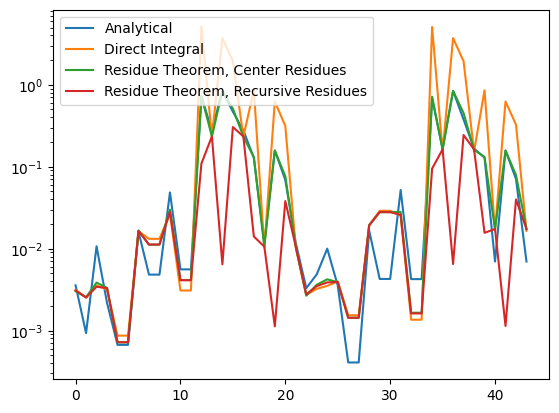

In [23]:

a = np.array([range(len(P1))]).T
plt.semilogy(a, np.diag(P1), a, np.diag(P2), a, np.diag(P3),a, np.diag(P4))
plt.legend(('Analytical', 'Direct Integral', 'Residue Theorem, Center Residues', 'Residue Theorem, Recursive Residues'))
plt.show()

/home/guillaume/.local/lib/python3.7/site-packages/numpy/core/_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


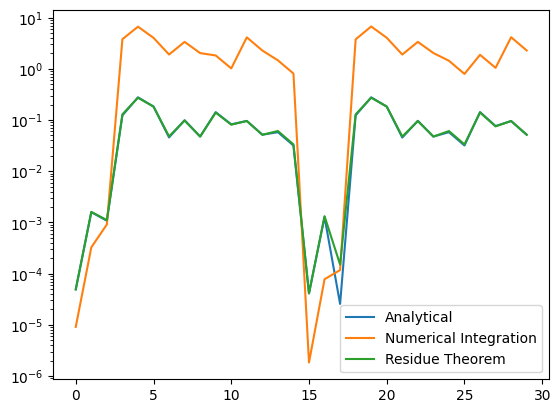

In [165]:
a = np.array([range(len(P1))]).T
plt.semilogy(a, np.diag(P1), a, np.diag(P2),a, np.diag(P3))
plt.legend(('Analytical','Numerical Integration', 'Residue Theorem'))
plt.show()

In [164]:
np.diag(P2-P1)[:4],np.diag(P3-P1)[:4]

(array([-4.00349544e-05, -1.26147717e-03, -1.65923536e-04,  3.66259956e+00]),
 array([3.81437125e-07-4.55982173e-07j, 2.12242224e-05-7.85852575e-06j,
        3.24431476e-05-5.31916727e-06j, 5.86562142e-03-2.00237944e-06j]))

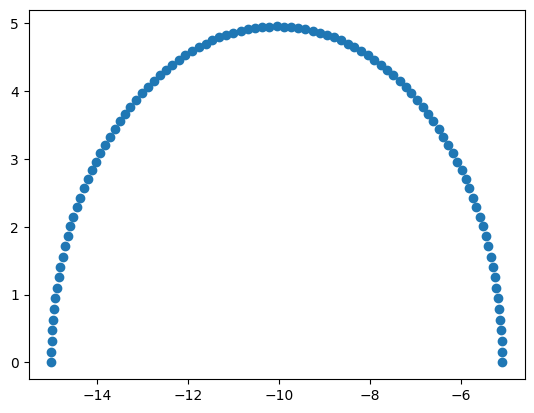

In [6]:
Emin = -15
Emax = -5.1
dE = 0.1

center = (Emin+Emax)/2
r = (Emin-Emax)/2
N = int((Emax-Emin)/dE)
theta = np.linspace(0, np.pi, N)
Egrid = r*np.exp(-1j*theta)+center
dS = abs(Egrid[1]-Egrid[0])
plt.scatter(Egrid.real, Egrid.imag)
plt.show()

In [7]:
Egrid

array([-15.        +0.00000000e+00j, -14.99745677+1.58655309e-01j,
       -14.98982969+3.17147589e-01j, -14.97712661+4.75313978e-01j,
       -14.95936057+6.32991950e-01j, -14.93654983+7.90019480e-01j,
       -14.90871783+9.46235212e-01j, -14.87589317+1.10147862e+00j,
       -14.83810957+1.25559019e+00j, -14.79540587+1.40841155e+00j,
       -14.74782595+1.55978568e+00j, -14.69541869+1.70955702e+00j,
       -14.63823795+1.85757167e+00j, -14.57634248+2.00367755e+00j,
       -14.5097959 +2.14772451e+00j, -14.43866657+2.28956454e+00j,
       -14.36302759+2.42905188e+00j, -14.28295668+2.56604321e+00j,
       -14.19853612+2.70039776e+00j, -14.10985266+2.83197747e+00j,
       -14.01699743+2.96064713e+00j, -13.92006584+3.08627452e+00j,
       -13.81915749+3.20873056e+00j, -13.71437609+3.32788941e+00j,
       -13.60582928+3.44362863e+00j, -13.49362863+3.55582928e+00j,
       -13.37788941+3.66437609e+00j, -13.25873056+3.76915749e+00j,
       -13.13627452+3.87006584e+00j, -13.01064713+3.96699743e+

In [7]:
mat = io.loadmat('tau.mat')
gmat = io.loadmat('g.mat')
formSigmaE(np.arange(264), np.asmatrix(gmat['GE1']), np.asmatrix(mat['tau1'])*27.211386, -5.1, np.asmatrix(mat['stau1']), 264)

matrix([[ 2.12573237e+01-15.15283101j,  3.72361630e+01-31.47949617j,
          2.61012678e+01-12.64504469j, ...,  1.36848980e+00 +1.06030587j,
          5.16748893e-01 -1.69017983j,  1.89074780e+00 -1.733412j  ],
        [ 3.72361630e+01-31.47949617j,  6.30514018e+01-68.18476971j,
          5.18955391e+01-22.41936733j, ...,  2.84047505e+00 +2.07814528j,
          1.40767948e+00 -3.8157357j ,  4.35892677e+00 -3.94306755j],
        [ 2.61012678e+01-12.64504469j,  5.18955391e+01-22.41936733j,
          1.38174772e+01-23.9967188j , ...,  1.11866138e+00 +1.78556153j,
         -1.34921282e-01 -1.5307603j ,  7.98573143e-01 -1.05853523j],
        ...,
        [ 1.36848980e+00 +1.06030587j,  2.84047505e+00 +2.07814528j,
          1.11866138e+00 +1.78556153j, ..., -2.01177700e+01-10.89495398j,
          5.54910479e+00 +4.76545204j, -2.08048684e-01 -0.29765321j],
        [ 5.16748893e-01 -1.69017983j,  1.40767948e+00 -3.8157357j ,
         -1.34921282e-01 -1.5307603j , ...,  5.54910479e+00 +4.765

In [9]:
 coup1=E*stau1-tau1*hartree_unit
coup2=E*stau2-tau2*hartree_unit;
G1=GE1; G2=GE2;
sig1_Ef=coup1*G1*coup1'; sig2_Ef=coup2*G2*coup2';

SyntaxError: invalid syntax (2216157415.py, line 4)

In [ ]:
type(mat['tau1'])

In [11]:
E = 2
Gam = np.asmatrix([[0.1,0, 0], [0,0, 0], [0, 0, 0.1]])
sig = -1j*Gam/2
H = np.asmatrix([[0, 0.1, 0], [0.1, 1, 0.1], [0, 0.1, 0]])
D, V = LA.eig(H+sig)
#D = np.array([1+0.1j, -2+0.1j, 3-0.1j])
#V = np.asmatrix([[1/np.sqrt(3), 1/np.sqrt(3), -1/np.sqrt(3)], [1/np.sqrt(2), 1/np.sqrt(2), 0], [1/np.sqrt(2), -1/np.sqrt(2), 0]])
for ind, E in enumerate(D):
    Y = V[:, ind] * V.getH()[ind,:]
    eps = 1e-9
    Gr = np.asmatrix(np.diag(1/(E+eps-D)))
    Gr = V*Gr*V.getH()
    #print(Gr*1e-10)
    #print(Y)
    Ga = np.asmatrix(np.diag(1/(E+eps-np.conj(D))))
    Ga = V*Ga*V.getH()
    print(Y*Gam*Ga)
    print(Gr*Gam*Ga*-1*eps)


Gr = np.asmatrix(np.diag((E-D)/(E-D)))

[[ 0.00088709+0.00945949j  0.00444657+0.09599428j  0.00088709+0.00945949j]
 [ 0.00440389+0.09688138j -0.00175726+0.98091108j  0.00440389+0.09688138j]
 [ 0.00088709+0.00945949j  0.00444657+0.09599428j  0.00088709+0.00945949j]]
[[-0.00088709-0.00945949j -0.00444657-0.09599428j -0.00088709-0.00945949j]
 [-0.00440388-0.09688137j  0.00175726-0.98091099j -0.00440388-0.09688137j]
 [-0.00088709-0.00945949j -0.00444657-0.09599428j -0.00088709-0.00945949j]]
[[ 4.99999961e-09+5.00000000e-01j  1.51995909e-16-1.06154006e-16j
  -5.00000120e-09-5.00000000e-01j]
 [-9.47236355e-17-2.60425927e-17j  1.38915147e-32+3.49534455e-32j
   9.47236355e-17+2.60425927e-17j]
 [-4.99999881e-09-5.00000000e-01j -1.47260249e-16+1.25096646e-16j
   5.00000037e-09+5.00000000e-01j]]
[[-8.51472569e-09-5.00000024e-01j  9.41095983e-10+4.71852857e-09j
   1.48527512e-09+4.99999976e-01j]
 [ 9.32480619e-10+4.76687964e-09j -2.33120128e-10-9.32480465e-10j
   9.32480430e-10+4.76687959e-09j]
 [ 1.48527272e-09+4.99999976e-01j  9.41096

/home/guillaume/anaconda3/envs/NEGFCode/lib/python3.7/site-packages/ipykernel_launcher.py:21: RuntimeWarning: invalid value encountered in true_divide


In [8]:
P3

(matrix([[-9.22065848e-06-7.82994719e-07j,
           5.17216802e-05+8.46877438e-06j,
           7.08761964e-05+1.61575510e-05j,
           3.17073326e-06-2.30911883e-05j,
          -4.03957957e-05+8.12670591e-05j,
          -1.63859369e-05+1.91000210e-05j,
           1.99640269e-05+9.96534083e-08j,
          -8.54098645e-05+1.11186360e-05j,
          -1.02246848e-05+1.11128833e-05j,
          -5.40419431e-05-8.36284413e-05j,
          -1.18777571e-04-9.25819701e-05j,
           1.80640693e-05+4.88991773e-05j,
           1.84968726e-05+3.48420235e-05j,
           5.19675401e-06+4.34286040e-05j,
           9.24571060e-06+2.43017144e-05j,
           2.86034002e-06-1.87653625e-06j,
          -1.30495800e-05+2.07486947e-05j,
          -1.37853517e-05+1.69079133e-05j,
          -2.96317168e-06-9.98850330e-06j,
          -2.13045531e-05+6.74335690e-06j,
          -1.06026133e-05-1.76739655e-06j,
          -5.11291006e-06-2.76660323e-05j,
          -1.74411825e-05+5.23520555e-05j,
          -

In [2]:
a = [3,4,5,6]
for i,x in enumerate(a):
    print(i, x)

0 3
1 4
2 5
3 6
